In [1]:
"""
<군집(Clustering) 분석>
 - 분류 분석 중 비지도 학습의 분석 방법임
 - 비지도학습: 종속변수, 즉 정답(target) 데이터 없이 분류하는 방법
 - 데이터를 수집하였을 때 종속변수 없이 독립변수만 존재하는 경우에는 비지도학습을 수행해야함
   또는 종속변수의 데이터에 문제가 발생하였을때도 ,독립변수를 이용하여 종속변수를 찾아내기도 함
 - 데이터 유형: 보통 정형 또는 비정형 데이터에서 target이 없는 경우를 의미함
              : 주로 비정형 데이터의 경우 비지도학습 기반의 군집분석을 많이 함
                (종속변수, 정답이 없는 경우가 많음)
 - 군집분석: 패턴이 유사한 데이터들간에 묶는(모음, 분류) 작업을 수행
 - 묶음 단위를 군집(Clustering)이라고 칭함
 - 대표 모델: KMeans(K평균) 모델, DBSCAN모델, 이외 등등
 - 평가 방법: Silhouette Score(실루엣평가), adjusted rand Score
"""

'\n<군집(Clustering) 분석>\n - 분류 분석 중 비지도 학습의 분석 방법임\n - 비지도학습: 종속변수, 즉 정답(target) 데이터 없이 분류하는 방법\n - 데이터를 수집하였을 때 종속변수 없이 독립변수만 존재하는 경우에는 비지도학습을 수행해야함\n   또는 종속변수의 데이터에 문제가 발생하였을때도 ,독립변수를 이용하여 종속변수를 찾아내기도 함\n - 데이터 유형: 보통 정형 또는 비정형 데이터에서 target이 없는 경우를 의미함\n              : 주로 비정형 데이터의 경우 비지도학습 기반의 군집분석을 많이 함\n                (종속변수, 정답이 없는 경우가 많음)\n - 군집분석: 패턴이 유사한 데이터들간에 묶는(모음, 분류) 작업을 수행\n - 묶음 단위를 군집(Clustering)이라고 칭함\n - 대표 모델: KMeans(K평균) 모델, DBSCAN모델, 이외 등등\n - 평가 방법: Silhouette Score(실루엣평가), adjusted rand Score\n'

### KMeans 모델

In [2]:
"""
<KMeans(K평균) 모델>
 - 미리 정의된 K개의 클러스터(군집) 갯수로 나누는 군집화 모델
 - K의 값은 클러스터(군집)의 갯수를 의미함
 - 모델(클래스) 생성시에 K의 값을 미리 정의해야 하는 단점이 있음
 - K의 값에 따라 선능이 변화되기에, K값을 하이퍼파라미로로 사용합니다.
  - 단, 군집의 갯수를 유추할 수 있는 경우에는 해당 갯수에 대한 튜닝은 의미가 없을 수도 있음
 - K개의 각 클러스터에는 "중심점"을 가짐(중심점, 중앙포인트라고 칭함
 
<KMeans 작동방식>
 - 1. 최초 K개의 중심점을 랜덤하게 임의로 모델이 체크하게됨
 - 2. 최초 중심점을 기반으로 독립변수들을 중심점과의 거리를 기준으로 가까운 곳의 클러스에 속하게 분류함
 - 3. 새로우 독립변수가 군집에 속하게 되는 순간 중심점을 다시 재계산하여 선정함
  -> 재계산된 중심점이 해당 군집의 중심점이 됨
 - 4. 2~3번 반복 수행
  -> 더 이상 군집이 필요하지 않을 때까지 수행(모델이 알아서 수행)
  
<KMeans 특징 정리>
 - 군집의 갯수(K)를 미리 설정해야 함
 - 대규모 데이터에 효율적임: 계산이 비교적 빠름(타 모델에 비하여)
  (이미 군집의 갯수를 설정하고 진행하기 때문에...
  
<사용 라이브러리>
 - 사용 패키지: sklearn.cluster
 - 사용 모델: KMeans
"""

'\n<KMeans(K평균) 모델>\n - 미리 정의된 K개의 클러스터(군집) 갯수로 나누는 군집화 모델\n - K의 값은 클러스터(군집)의 갯수를 의미함\n - 모델(클래스) 생성시에 K의 값을 미리 정의해야 하는 단점이 있음\n - K의 값에 따라 선능이 변화되기에, K값을 하이퍼파라미로로 사용합니다.\n  - 단, 군집의 갯수를 유추할 수 있는 경우에는 해당 갯수에 대한 튜닝은 의미가 없을 수도 있음\n - K개의 각 클러스터에는 "중심점"을 가짐(중심점, 중앙포인트라고 칭함\n \n<KMeans 작동방식>\n - 1. 최초 K개의 중심점을 랜덤하게 임의로 모델이 체크하게됨\n - 2. 최초 중심점을 기반으로 독립변수들을 중심점과의 거리를 기준으로 가까운 곳의 클러스에 속하게 분류함\n - 3. 새로우 독립변수가 군집에 속하게 되는 순간 중심점을 다시 재계산하여 선정함\n  -> 재계산된 중심점이 해당 군집의 중심점이 됨\n - 4. 2~3번 반복 수행\n  -> 더 이상 군집이 필요하지 않을 때까지 수행(모델이 알아서 수행)\n  \n<KMeans 특징 정리>\n - 군집의 갯수(K)를 미리 설정해야 함\n - 대규모 데이터에 효율적임: 계산이 비교적 빠름(타 모델에 비하여)\n  (이미 군집의 갯수를 설정하고 진행하기 때문에...\n  \n<사용 라이브러리>\n - 사용 패키지: sklearn.cluster\n - 사용 모델: KMeans\n'

### 라이브러리 정의

In [3]:
# 데이터 처리
import pandas as pd
import numpy as np

# 스케일링
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

# 데이터 분류
from sklearn.model_selection import train_test_split

# 튜닝 모델
from sklearn.model_selection import GridSearchCV

# 분류 평가(정답을 알고 있는 경우만 해당, 지도학습 평가지표 모두 사용가능)
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# 분류 평가(군집분석 평가)
from sklearn.metrics import silhouette_score, adjusted_rand_score

# 군집 모델
from sklearn.cluster import KMeans, DBSCAN

# 주성분분석(PCA)
from sklearn.decomposition import PCA

# 시각화 라이브러리
import matplotlib.pyplot as plt
import seaborn as sns

plt.rc("font", family="Malgun Gothic")

plt.rcParams["axes.unicode_minus"] = False

### 데이터 불러들이기

In [4]:
### 와인데이터 읽어들이기
# - 변수명: data
data = pd.read_csv("./data/08_wine.csv")
data.info()
data.head(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0


### 독립 및 종속변수로 분리하기
##### - (정답이 포함된 데이터에서 종속변수 분리)

In [5]:
### 독립변수명: X, 종속변수명: y
# - numpy array로 변환해서 처리
X = data.iloc[:, :-1].to_numpy()
y = data["class"].to_numpy()


X.shape, y.shape

((6497, 3), (6497,))

### 데이터 스케일링 처리

In [6]:
### 변수명: X_scaled
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
X_scaled.shape

(6497, 3)

### 훈련:테스트 = 8:2로 분리

In [7]:
### 변수명: X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(5197, 3) (5197,)
(1300, 3) (1300,)


### 튜닝 모델 사용하기 위한 하이퍼파라미터 정의하기

In [8]:
### 하이퍼파라미터 대표 변수
param_grid = {
    # - 군집 시 중심점 이동 횟수 설정
    "n_init" : [10, 30, 50],
    
    # - 훈련 반복 횟수 설정
    "max_iter" : [10, 30, 50],
    
    # - 모델 훈련 종료 시점 정의하기
    #  - 중심점 이동시 설정한 값(학습정확도)보다 성능이 작으면 모델 훈련 종료 시키기
    #  - 0~1 사이의 값 사용
    "tol" : [0.0001, 0.001, 0.01, 1]
}

########### [튜닝 모델 클래스 설정 값] ############
# - KFold 갯수
cv = 5

# - 평가기준 정의(군집분석도 분류분석이기에 정확도를 기준으로 평가진행)
#  -> 모델 선정 기준은 자동을 accuracy가 됨(기본값임)
scoring = "accuracy"

# - KMeans 모델의 클러스터(군집)의 갯수 정의 (와인종류의 범주는 2개)
n_cluster = 2

### 사용할 실제 모델 생성하기(클래스 생성)

In [9]:
### KMeans모델 생성하기
# - 기본 값 설정이 필요함
kmeans = KMeans(n_clusters=n_cluster, random_state=42)
kmeans

KMeans(n_clusters=2, random_state=42)

### 튜닝 모델(AutoML) 생성하기

In [10]:
### AutoML은 종속변수(target, 정답)가 있는 경우
grid_search = GridSearchCV(
    kmeans, param_grid=param_grid, cv=cv, scoring=scoring
)
grid_search

GridSearchCV(cv=5, estimator=KMeans(n_clusters=2, random_state=42),
             param_grid={'max_iter': [10, 30, 50], 'n_init': [10, 30, 50],
                         'tol': [0.0001, 0.001, 0.01, 1]},
             scoring='accuracy')

In [11]:
### 훈련시키기
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KMeans(n_clusters=2, random_state=42),
             param_grid={'max_iter': [10, 30, 50], 'n_init': [10, 30, 50],
                         'tol': [0.0001, 0.001, 0.01, 1]},
             scoring='accuracy')

In [12]:
### 최적의 모델 추출하기
# - 변수명: best_model
# 최적의 파라미터 출력
best_model = grid_search.best_estimator_
best_model

KMeans(max_iter=10, n_clusters=2, n_init=50, random_state=42, tol=0.01)

### 기존의 지도학습 분류 방식으로 정확도 평가

In [13]:
### 테스트 데이터로 예측하기
# - 변수명 test_pred
test_pred = best_model.predict(X_test)
test_pred

array([1, 1, 0, ..., 1, 1, 0])

In [14]:
### 예측 정확도 평가지표 확인하기(accuracy)
# - 변수명 test_acc
test_acc = accuracy_score(y_test, test_pred)
test_acc

0.4453846153846154

[[  6 314]
 [407 573]]


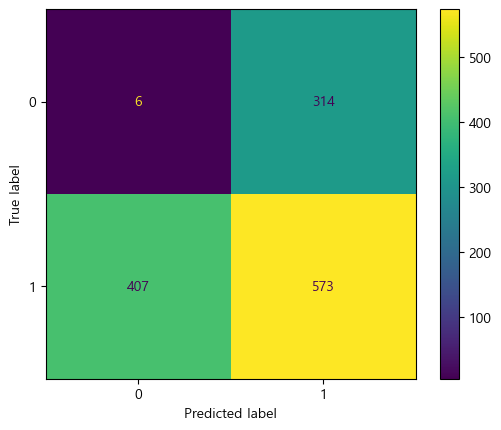

In [15]:
### 오차행렬 매트릭스 표 확인하기
cm = confusion_matrix(y_test, test_pred)
print(cm)

dist = ConfusionMatrixDisplay(confusion_matrix=cm)
dist.plot()
plt.show()

### 클러스터 결과를 산점도로 시각화하기

In [16]:
### 산점행렬도 시각화하기
# - 테스트 데이터를 이용하여 산점행렬도를 시각화 하기위한 데이터 프레임 생성하기
# - 컬럼명: alcohol, sugar, pH, class, cluster
#                                     (cluster는 테스트 데이터로 예측한 결과 값)
# - 데이터프레임 변수명: test_data

test_data = pd.DataFrame({
    "alcohol" : X_test[:, 0],
    "sugar"   : X_test[:, 1],
    "pH"      : X_test[:, 2],
    "class"   : y_test,
    "cluster" : test_pred
})

test_data

,alcohol,sugar,pH,class,cluster
0,-0.244672,-0.681719,0.506915,1.0,1
1,0.090724,-0.051127,-0.239471,1.0,1
2,-0.244672,1.567391,0.133722,1.0,0
3,0.593818,-0.912936,1.813090,1.0,1
4,1.683855,-0.639680,0.133722,1.0,1
...,...,...,...,...,...
1295,1.516157,-0.408463,1.128903,1.0,1
1296,0.342271,-0.681719,0.755710,1.0,1
1297,-1.083162,-0.345403,-0.363868,0.0,1
1298,0.006875,-0.702739,1.253300,1.0,1


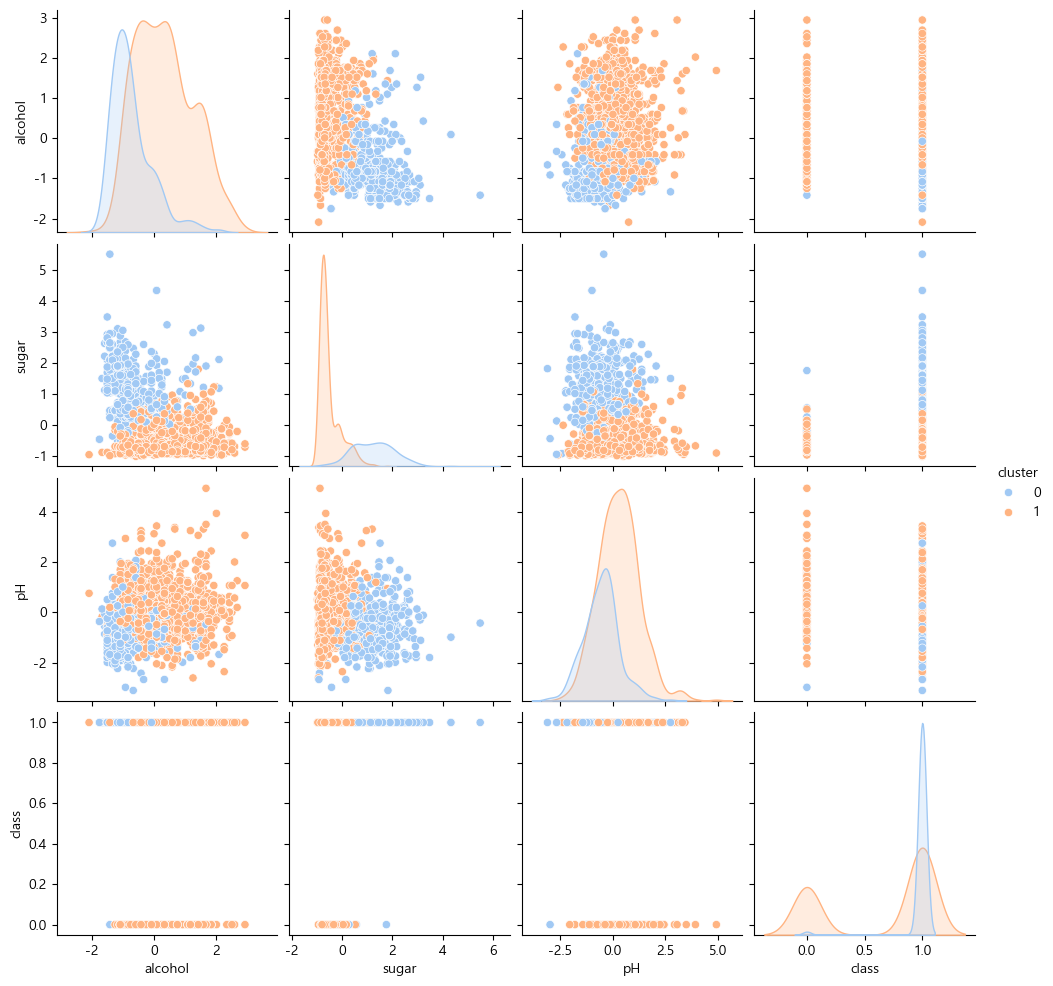

In [17]:
### 산점행렬도 그리기
# - 특성별로 산점도를 여러개 그리는 그래프: pairplot()
# - hue : 범주 값
sns.pairplot(test_data, hue="cluster", palette="pastel")
# - 출력 후 메모리 삭제
plt.show()

### 아이리스(iris) 붓꽃 데이터셋 사용해서 군집분석하기

In [18]:
### 아이리스(iris) 꽃데이터 불러들이기
# - 데이터 위치: sklearn.datasets import load_iris
from sklearn.datasets import load_iris
iris = load_iris()
iris

### 독립변수: data
# - sepal length: 꽃받침 길이
# - sepal width : 꽃받침 너비
# - pepal length: 꽃잎 길이
# - pepal width : 꽃잎 너비

### 종속변수(꽃의 종류): target
# - 종속변수 0: setosa
# -          1: versicolor
# -          2: virginica


{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [19]:
### 독립변수와 종속변수 추출하기
# 독립변수명: X, 종속변수명: y
X = iris["data"]
y = iris["target"]

X, y

(array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
        [5

### 독립변수 특성 4개를 이용해서 군집분석하기

In [20]:
### 튜닝 모델 사용하지 않고, 직접 KMean 모델 사용하여 훈련
# - 중심점 이동 제한 횟수 : 10번
# - 클러스터 갯수(K) : 3
# - kmeans_model

kmeans_model = KMeans(n_clusters=3, n_init=10, random_state=42)
kmeans_model


KMeans(n_clusters=3, n_init=10, random_state=42)

In [21]:
### 훈련시키기
# - 훈련과 테스트 데이터로 분리하지 않았습니다.
# - X데이터 하나로 훈련과 테스트 결과 확인
# - 훈련과 예측을 동시에 수행하는 함수 사용
pred = kmeans_model.fit_predict(X)

print(pred)
print(y)
    
### 군집모델은 범주의 번호를 임의로 부여합니다.
# - 실제 범주의 위치 범호와 다를 수 있음

# 실제 범주 0 -> 예측 군집 1로
#           1 ->           0으로
#           2 ->           2로

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


### 군집분석 평가하기

In [22]:
"""
<silhouette score>
 - 클러스터링 모델 평가 지표로 사용됨
 - 비지도 학습인 경우 사용됨
 - 데이터들이 클러스터 중심점에 잘 속해 있는지와,
   다른 클러스터들과 잘 분리되어 있는지를 측정하는 지표임
   즉, 응집도와 분리도를 평감
 - 결과값의 범위: -1~1 사이의 값
   *  1에 가까울 수록: 잘 분리된 클러스트(응집도가 높고, 군집 간에 분리가 잘된 것)
   *  0에 가까울 수록: 군집이 겹치거나 경계가 불분명한 것
   * -1에 가까울 수록: 군집이 잘 안된 것
"""
# 훈련/검증/테스트 독립변수와 예측결과를 사용하여 평가함
s_score = silhouette_score(X, pred)
s_score

0.5528190123564094

In [23]:
"""
<adjusted rand score>
 - 클러스터링 예측결과와 종속변수(정답)을 비교, 즉 정확성을 평가하는 지표
 - 종속변수의 값을 알고 있는 경우만 사용가능한 평가 방법임
 - 점수는 -1 ~ 1 사이
 - -1~1 사이의 값
   *  1에 가까울 수록: 잘 분리된 클러스트(응집도가 높고, 군집 간에 분리가 잘된 것)
   *  0에 가까울 수록: 군집이 겹치거나 경계가 불분명한 것
   * -1에 가까울 수록: 군집이 잘 안된 것
"""
a_score = adjusted_rand_score(y, pred)
a_score

0.7302382722834697

### PCA(주성분 분석)

In [24]:
"""
<PCA(주성분 분석)>
 - 분류 및 회구 분석 모두에서 사용가능한 방법으로 주요 특성만 추출항 사용하는 방식
 - 주성분 분석: 훈련에 사용된 특성들 중에 가장 특징을 잘 나타내는 특성들을 추출하는 방식
 - 특성중요도는 훈련에 여향을 많이 미치는 정도를 확인했다면,
   주성분 분석은 특성들 중 특징(패턴)을 잘 나타내는 주요 값들을 추출하여 별도의 차원으로
   다시 데이터를 구성하여 훈련에 사용되는 방식임
 - 주로 사용되는 시점
   * 특성이 너무 많은 경우에 주요 특징(패턴)을 가지고 데이터들을 추출하여 열의 갯수를 축소하여 사용됨
   * 열의 갯수, 즉 열의 갯수를 "차원"이라고 칭하며,
   * 차원을 줄인다고 해서 "차원축소"라고 칭하기도 합니다
   * 많은 특성들의 열의 갯수를 축소하여 사용되기에 -> 훈련 속도가 빨라짐
   * 열의 갯수를 줄인다고 해서 -> 열을 삭제하는 개념이 아니며
     전체 특성(열)들 중에서 특징을 잘 나타내는 값들을 모아서 별도의 차원으로 만들어 내는 것임
     
<사용 라이브러리>
 - 사용 패키지: sklearn.decomposition
 - 주성분(차원축소) 라이브러리(클래스, 변환기): PCA
 - PCA 클래스 생성시 축소할 차원을 정의해야 합니다
"""

'\n<PCA(주성분 분석)>\n - 분류 및 회구 분석 모두에서 사용가능한 방법으로 주요 특성만 추출항 사용하는 방식\n - 주성분 분석: 훈련에 사용된 특성들 중에 가장 특징을 잘 나타내는 특성들을 추출하는 방식\n - 특성중요도는 훈련에 여향을 많이 미치는 정도를 확인했다면,\n   주성분 분석은 특성들 중 특징(패턴)을 잘 나타내는 주요 값들을 추출하여 별도의 차원으로\n   다시 데이터를 구성하여 훈련에 사용되는 방식임\n - 주로 사용되는 시점\n   * 특성이 너무 많은 경우에 주요 특징(패턴)을 가지고 데이터들을 추출하여 열의 갯수를 축소하여 사용됨\n   * 열의 갯수, 즉 열의 갯수를 "차원"이라고 칭하며,\n   * 차원을 줄인다고 해서 "차원축소"라고 칭하기도 합니다\n   * 많은 특성들의 열의 갯수를 축소하여 사용되기에 -> 훈련 속도가 빨라짐\n   * 열의 갯수를 줄인다고 해서 -> 열을 삭제하는 개념이 아니며\n     전체 특성(열)들 중에서 특징을 잘 나타내는 값들을 모아서 별도의 차원으로 만들어 내는 것임\n     \n<사용 라이브러리>\n - 사용 패키지: sklearn.decomposition\n - 주성분(차원축소) 라이브러리(클래스, 변환기): PCA\n - PCA 클래스 생성시 축소할 차원을 정의해야 합니다\n'

In [25]:
### 특성 2개로 줄이기
# - 즉, 주성분의 특성 2개로 차원 축소하기

### PCA 변환기 클래스 생성하기
# - 축소할 차원 정의하기
pca = PCA(n_components=2)
pca

### PCA 변환기를 통해 주성분 찾기
pca.fit(X)

### 3. 찾은 주성분으로 데이터 변환하기
# - 훈련/검증/테스트 독랍변수 데이터만 변환합니다.(기존 변환기와 사용법 동일)
X_pca = pca.transform(X)
X_pca.shape, X.shape

((150, 2), (150, 4))

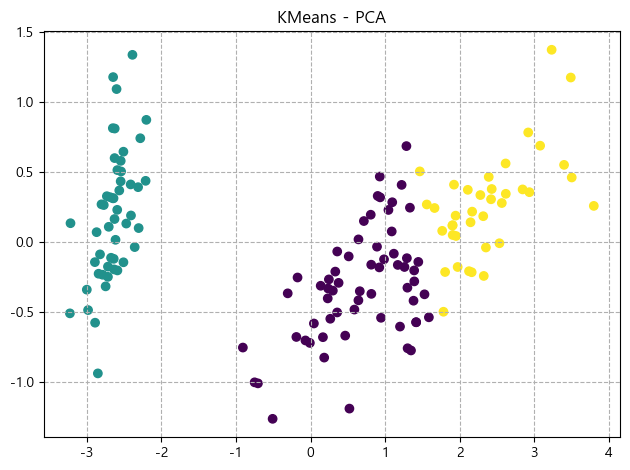

In [26]:
### 산점도 그리기
plt.title("KMeans - PCA")
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=pred)
plt.grid(linestyle='--')
plt.tight_layout()
plt.show()

### DBSCAN 모델 사용하기

In [27]:
"""
<DBSCAN 모델>
 - 밀도 기반의 군집화 모델
 - 밀도는 밀집도를 의미함(데이터들이 얼마나 몰려 있는가를 기준으로 클러스터 형성)
 - 특정 중심점(중심 포인트)의 밀도를 기준으로 클러스트러를 형성함
 - 밀도가 높은 영역은 클러스터로 포함시키고,
 - 밀도가 낮은 영역은 클러스터에 포함시키지 않고 -> 노이즈(이상치)로 간주함
   (노이즈 데이터가 포함된 클러스터 번호는 -1이 됨)
   
<DBSCAN 군집 기능>
 - 1. 임의 각 데이터 중심점을 기준으로 주변 반경(반지름 거리) 내의 
      이웃 클러스터의 데이터들의 포인트 수 계산
 - 2. 이웃 클러스터의 데이터 수가 설정한 최소 샘플수(min_sample, 밀집객수를 의미함)를 충족하면,
      해당 포인트를 핵심 포링트로 간주하여 클러스터에 포함시킴
 -3. 클러스터에 속하지 않는 이웃 클러스터들은 모두 노이즈(이상치)로 -1 군집으로 형성시킴
 
<DBSCAN 특징>
 - 모델이 자동으로 군집 갯수 결정함
 - 노이즈(이상치) 군집이 발생함(-1로 군집번호가 부여됨)
 - 군집의 갯수를 모르는 상태로 훈련을 수행하기에,
   데이터의 양이 많은 경우에는 속도가 다소 느릴 수 있음
"""

'\n<DBSCAN 모델>\n - 밀도 기반의 군집화 모델\n - 밀도는 밀집도를 의미함(데이터들이 얼마나 몰려 있는가를 기준으로 클러스터 형성)\n - 특정 중심점(중심 포인트)의 밀도를 기준으로 클러스트러를 형성함\n - 밀도가 높은 영역은 클러스터로 포함시키고,\n - 밀도가 낮은 영역은 클러스터에 포함시키지 않고 -> 노이즈(이상치)로 간주함\n   (노이즈 데이터가 포함된 클러스터 번호는 -1이 됨)\n   \n<DBSCAN 군집 기능>\n - 1. 임의 각 데이터 중심점을 기준으로 주변 반경(반지름 거리) 내의 \n      이웃 클러스터의 데이터들의 포인트 수 계산\n - 2. 이웃 클러스터의 데이터 수가 설정한 최소 샘플수(min_sample, 밀집객수를 의미함)를 충족하면,\n      해당 포인트를 핵심 포링트로 간주하여 클러스터에 포함시킴\n -3. 클러스터에 속하지 않는 이웃 클러스터들은 모두 노이즈(이상치)로 -1 군집으로 형성시킴\n \n<DBSCAN 특징>\n - 모델이 자동으로 군집 갯수 결정함\n - 노이즈(이상치) 군집이 발생함(-1로 군집번호가 부여됨)\n - 군집의 갯수를 모르는 상태로 훈련을 수행하기에,\n   데이터의 양이 많은 경우에는 속도가 다소 느릴 수 있음\n'

In [28]:
### 와인데이터 사용(iris 데이터 사용 안함함)
# - 사용하는 독립변수, 종속변수

### y 변수의 데이터는 위에서 iris데이터가 들어갔기에 다시 와인데이터로 아래 실행
# - 와인 데이터로 다시 정의 후 사용
X = data.iloc[:, :-1].to_numpy()
y = data["class"].to_numpy()

scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
X_scaled.shape, y.shape

((6497, 3), (6497,))

In [29]:
### DBSCAN 모델 생성하기
# - eps(epsilon): 거리반경
#               : 특정 데이터를 중심으로 하는 반경
#               : 해당 반경 내에 있는 데이터들을 이웃으로 간주함
#               : 보통 0~1 사이의 값 사용
# - min_samples : 최소 샘플 수 (클러스터 밀도, 밀집도라고 칭함)
#               : 하나의 클러스터(군집)을 형성하기 위해 eps 내에 존재해야하는 
#                 최소 데이터 수를 의미함(최소 샘플 수 이상의 데이터들이 군집될 수 있음)
#               : 최소 데이터 수에 미달하는 경우 노이즈(이상치) 데이터로 분류(-1 군집으로 형성됨)
#               : 보통 2~10 사이의 샘플수를 사용하지만, 더 많이 사용하는 경우도 있음
# - eps와 min_samples는 하이퍼파라미터로 성능에 영향을 미치며,
#   최소샘플수는 특정지을 수 없는 값임
dbscan = DBSCAN(eps = 0.5, min_samples=5)
dbscan

DBSCAN()

In [30]:
### 훈련시키기
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KMeans(n_clusters=2, random_state=42),
             param_grid={'max_iter': [10, 30, 50], 'n_init': [10, 30, 50],
                         'tol': [0.0001, 0.001, 0.01, 1]},
             scoring='accuracy')

In [31]:
### 훈련과 동시에 예측하기
clusters = dbscan.fit_predict(X_scaled)
clusters.shape

(6497,)

### 예측결과값에서 노이즈(이상치) 확인하기

In [32]:
clusters[clusters == -1].shape

(64,)

In [33]:
### 독립변수 (X_scaled) 및 예측결과(cluster)에서 노이즈를 제거해주세요.
### 독립변수명: X_cleaned, 예측결과변수명: clusters_cleaned

X_cleaned = X_scaled[clusters != -1]
clusters_cleaned  = clusters[clusters != -1]

print(X_cleaned.shape, clusters_cleaned.shape)

(6433, 3) (6433,)


### 노이즈 제거 전/후를 각각 산점도 시각화하기 위해 PCA 차원축소하기

노이즈 제거 전: (6497, 2) / (6497,)
노이즈 제거 후: (6433, 2) / (6433,)


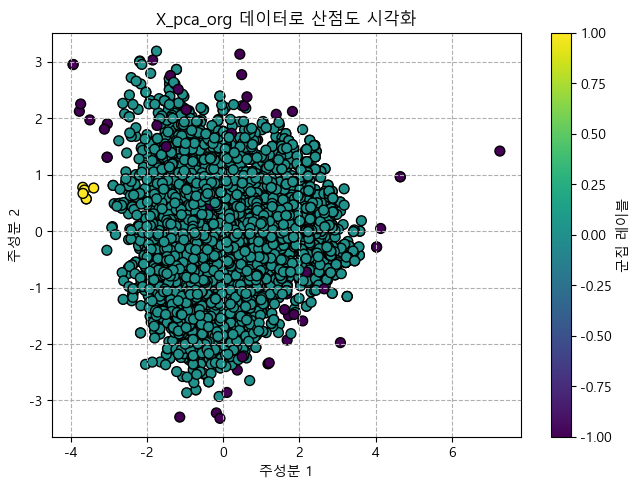

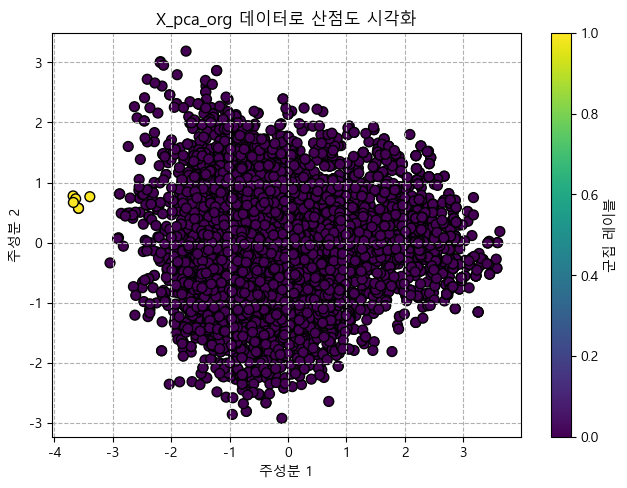

In [34]:
### 산점도 시각화를 위해 차원 2개의 주성분으로 축소하기
# 변환하는 데이터: X_scaled, X_cleaned
# 변화 후 변수명 : X_pca_org, X_pca_cleaned

pca = PCA(n_components=2)
pca.fit(X_scaled, X_cleaned)

X_pca_org = pca.transform(X_scaled)
X_pca_cleaned = pca.transform(X_cleaned)

print(f"노이즈 제거 전: {X_pca_org.shape} / {clusters.shape}")
print(f"노이즈 제거 후: {X_pca_cleaned.shape} / {clusters_cleaned.shape}")

### X_pca_org 데이터로 산점도 시각화(노이즈 제거 전)
plt.title("X_pca_org 데이터로 산점도 시각화")
plt.scatter(X_pca_org[:, 0], X_pca_org[:, 1], c=clusters, cmap='viridis', edgecolor='k', s=50)
plt.tight_layout()
plt.grid(linestyle="--")
plt.xlabel("주성분 1")
plt.ylabel("주성분 2")
plt.colorbar(label='군집 레이블')
plt.show()

### X_pca_cleaned 데이터로 산점도 시각화(노이즈 제거 후)
plt.title("X_pca_org 데이터로 산점도 시각화")
plt.scatter(X_pca_cleaned[:, 0], X_pca_cleaned[:, 1], c=clusters_cleaned, cmap='viridis', edgecolor='k', s=50)
plt.tight_layout()
plt.grid(linestyle="--")
plt.xlabel("주성분 1")
plt.ylabel("주성분 2")
plt.colorbar(label='군집 레이블')
plt.show()

### 군집분석 평가하기

In [35]:
### 노이즈가 있는 경우 평가
# - silhouette_score 및 adjusted_rand_score 각각 평가
# - 사용데이터: X_cleaned, y(노이즈 제거 후 사용), clusters_cleaned
sil_score = silhouette_score(X_scaled, clusters)
print(sil_score)

ar_score = adjusted_rand_score(y, clusters)
print(ar_score)

0.38455046188828285
0.0006635875733858523


In [36]:
### 노이즈가 없는 경우 평가
# - silhouette_score 및 adjusted_rand_score 각각 평가
# - 사용데이터: X_cleaned, y(노이즈 제거 후 사용), clusters_cleaned
sil_score = silhouette_score(X_cleaned, clusters_cleaned)
print(sil_score)

y_cleaned = y[clusters != -1]
ar_score = adjusted_rand_score(y_cleaned, clusters_cleaned)
print(ar_score)

0.4723368662483787
0.003828648754598595


### iris 데이터로 DBSCAN 훈련 및 평가해보기

(120, 4) (120,)
(30, 4) (30,)
노이즈 제거 전: (150, 2) / (150,)
노이즈 제거 후: (130, 2) / (130,)


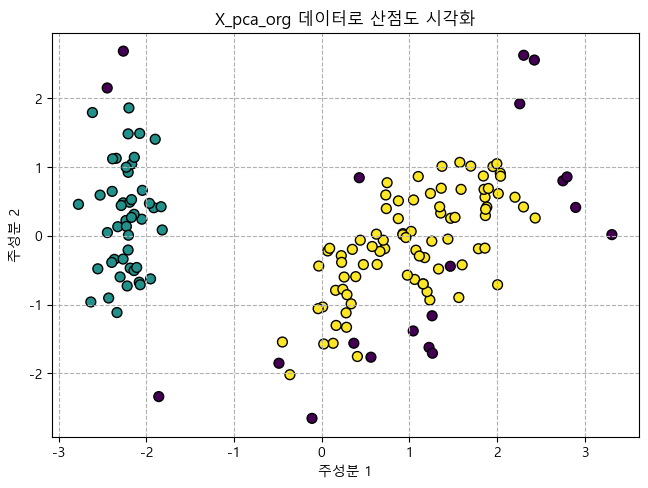

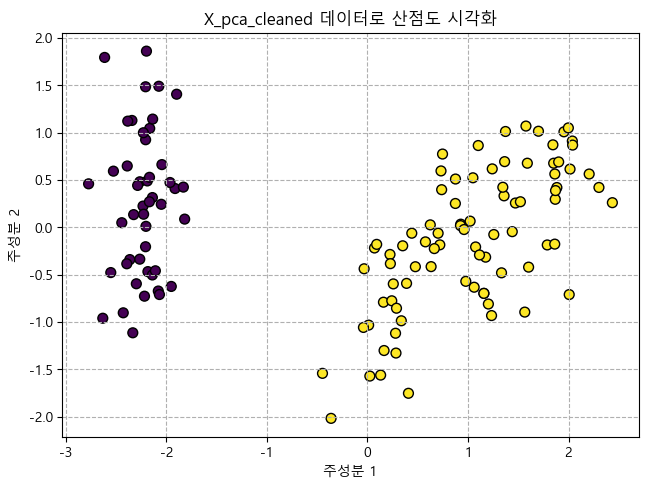

노이즈가 있는 경우 평가 - silhouette_score:0.4229447432633019, adjusted_rand_score:0.49439085742204647
노이즈가 없는 경우 평가 - silhouette_score:0.6290963901958079, adjusted_rand_score:0.6001439060202316


In [55]:
# iris 데이터셋 불러오기
iris = load_iris()

### 독립변수(X)와 종속변수(y) 추출하기
X = iris["data"]  # 독립변수
y = iris["target"]  # 종속변수

### 스케일링
scaler = StandardScaler()
scaler.fit(X) 
X_scaled = scaler.transform(X)

### 훈련 데이터와 테스트 데이터 분리 (8:2 비율)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# 훈련셋, 테스트셋 크기 출력
print(X_train.shape, y_train.shape)  # 훈련 데이터 크기
print(X_test.shape, y_test.shape)  # 테스트 데이터 크기

# DBSCAN 군집화 모델 설정
dbscan = DBSCAN(eps=0.7, min_samples=10)

# 훈련 데이터에 DBSCAN 모델 학습
dbscan.fit(X_train, y_train)

# DBSCAN을 사용하여 전체 데이터에 대해 군집화 수행
clusters = dbscan.fit_predict(X_scaled) 

# 노이즈(-1)인 데이터를 제거하여 클린 데이터 생성
X_cleaned = X_scaled[clusters != -1] 
y_cleaned = y[clusters != -1] 
clusters_cleaned = clusters[clusters != -1]

# PCA를 사용하여 2차원으로 차원 축소
pca = PCA(n_components=2)  
pca.fit(X_scaled)  
X_pca_org = pca.transform(X_scaled) 
X_pca_cleaned = pca.transform(X_cleaned)  

# 결과 출력 (차원 축소 전후의 데이터 크기)
print(f"노이즈 제거 전: {X_pca_org.shape} / {clusters.shape}")
print(f"노이즈 제거 후: {X_pca_cleaned.shape} / {clusters_cleaned.shape}")

### 산점도 시각화 (노이즈 제거 전)
plt.title("X_pca_org 데이터로 산점도 시각화")
plt.scatter(X_pca_org[:, 0], X_pca_org[:, 1], c=clusters, cmap='viridis', edgecolor='k', s=50)
plt.tight_layout()
plt.grid(linestyle="--") 
plt.xlabel("주성분 1") 
plt.ylabel("주성분 2")
plt.show()

### 산점도 시각화 (노이즈 제거 후)
plt.title("X_pca_cleaned 데이터로 산점도 시각화")
plt.scatter(X_pca_cleaned[:, 0], X_pca_cleaned[:, 1], c=clusters_cleaned, cmap='viridis', edgecolor='k', s=50)
plt.tight_layout() 
plt.grid(linestyle="--")
plt.xlabel("주성분 1")
plt.ylabel("주성분 2")
plt.show() 

# 평가 지표 계산 (실루엣 점수 및 조정 랜드 점수)
s_score = silhouette_score(X_scaled, clusters)
ad_score = adjusted_rand_score(y, clusters)

s_score_c = silhouette_score(X_cleaned, clusters_cleaned)
ad_score_c = adjusted_rand_score(y_cleaned, clusters_cleaned)

# 평가 결과 출력
print(f"노이즈가 있는 경우 평가 - silhouette_score:{s_score}, adjusted_rand_score:{ad_score}")
print(f"노이즈가 없는 경우 평가 - silhouette_score:{s_score_c}, adjusted_rand_score:{ad_score_c}")


### (해석)
# - iris 꽃의 종류 3가지에 대해서 군집 2개로 잘못 군집되고 있음
# - 노이즈 제거 후 실루엣 정확도는 0.6으로 나쁜편은 아니나,
# - 군집의 갯수가 원하는 3개로 분류되지 않았기에 사용하기 어려운 모델임
